In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nbodykit
from nbodykit.lab import BigFileCatalog
from pmesh.pm import ParticleMesh, RealField
from nbodykit.lab import FFTPower, ProjectedFFTPower, ArrayMesh


[ccmlin046.flatironinstitute.org:2139199] mca: base: component_find: unable to open /cm/shared/sw/pkg/devel/openmpi/1.10.7-hfi-slurm17.11/lib/openmpi/mca_btl_openib: libosmcomp.so.3: cannot open shared object file: No such file or directory (ignored)


In [3]:
f = BigFileCatalog('/mnt/ceph/users/cmodi/simbig/catalogs/hod.quijote_LH200.z0p0.zheng07.1.bf')

In [ ]:
nc = 256
pm = ParticleMesh(Nmesh=[nc, nc, nc], BoxSize=1024, dtype='f8')

In [5]:
# mesh = f.to_mesh(Nmesh=256).compute()[...]
# %timeit mesh = pm.paint(f['Position'].compute())[...]
# meshfield = pm.paint(f['Position'].compute())
mesh = pm.paint(f['Position'].compute())[...]

In [6]:
mesh.sum() #.sum()

542562.0000000008

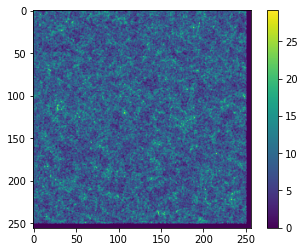

In [7]:
plt.imshow(mesh.sum(axis=0))
plt.colorbar()


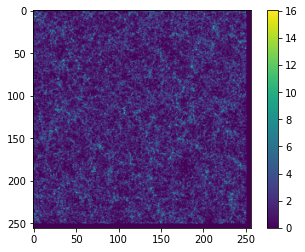

In [8]:
i = 2 
plt.imshow(mesh[i*nc//5:(i+1)*nc//5].sum(axis=0))
plt.colorbar()


In [105]:
# np.save('/mnt/ceph/users/cmodi/simbig/mesh/test', mesh.astype(np.float32))

In [95]:
splits = 4

idx = [[i*nc//splits, (i+1)*nc//splits] for i in range(splits)]
slices = [mesh[i*nc//splits:(i+1)*nc//splits].sum(axis=0) for i in range(splits)]
slices = slices + [mesh[:, i*nc//splits:(i+1)*nc//splits, :].sum(axis=1) for i in range(splits)]
slices = slices + [mesh[:, :, i*nc//splits:(i+1)*nc//splits].sum(axis=2) for i in range(splits)]


In [96]:
bs = 1024

In [103]:

i = 0 
f1 = ArrayMesh(mesh[i*nc//splits:(i+1)*nc//splits], BoxSize=bs)
f11 = ArrayMesh(mesh[:, i*nc//splits:(i+1)*nc//splits], BoxSize=bs)
i = 1 
f2 = ArrayMesh(mesh[i*nc//splits:(i+1)*nc//splits], BoxSize=bs)
i = 2 
f3 = ArrayMesh(mesh[i*nc//splits:(i+1)*nc//splits], BoxSize=bs)
i = 3 
f4 = ArrayMesh(mesh[i*nc//splits:(i+1)*nc//splits], BoxSize=bs)
p1 = ProjectedFFTPower(f1, axes=(1, 2)).power
k, p1 = p1['k'], p1['power']
p2 = ProjectedFFTPower(f2, axes=(1, 2)).power['power']
p3 = ProjectedFFTPower(f3, axes=(1, 2)).power['power']
p4 = ProjectedFFTPower(f4, axes=(1, 2)).power['power']
px = ProjectedFFTPower(f1, second=f2, axes=(1, 2)).power['power']
p11 = ProjectedFFTPower(f11, axes=(0, 2)).power['power']


In [98]:
f11.to_real_field()[...].shape

(256, 64, 256)

In [101]:
# px1 = ProjectedFFTPower(f1, second=f11, axes=[(1, 2), (0, 2)]).power['power'];


/mnt/home/cmodi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/mnt/home/cmodi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/mnt/home/cmodi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/mnt/home/cmodi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[]

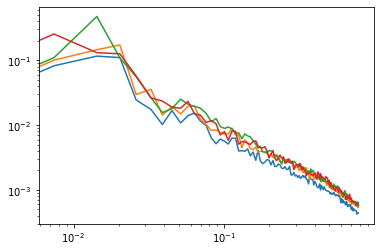

In [104]:
plt.plot(k, p1)
plt.plot(k, p2)
plt.plot(k, p3)
plt.plot(k, p4)
plt.loglog()

/tmp/ipykernel_1643413/1956917038.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(k, px/(p1*p2)**0.5)
/mnt/home/cmodi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


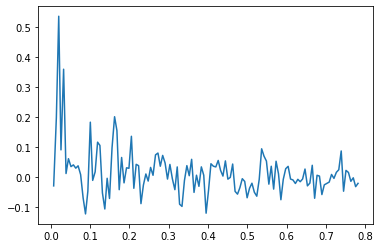

In [81]:
plt.plot(k, px/(p1*p2)**0.5)

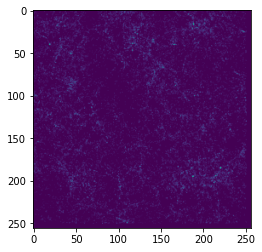

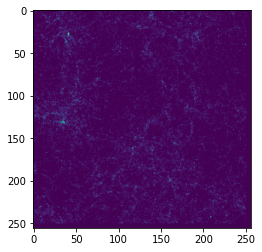

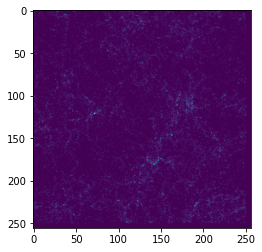

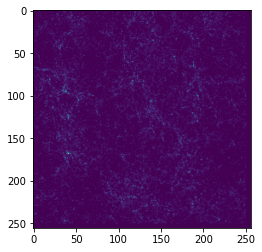

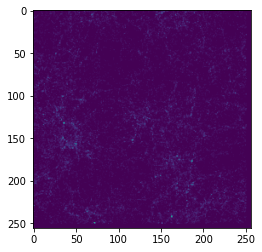

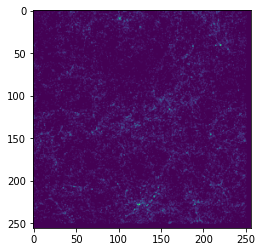

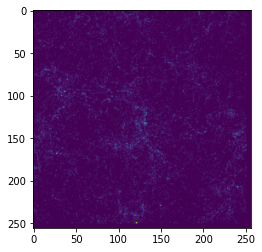

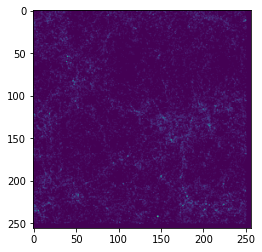

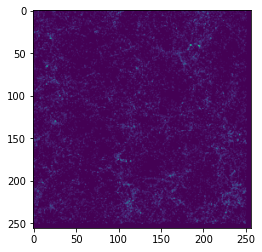

In [76]:
for i in range(9):
    plt.imshow(slices[i])
    plt.show()

# save

In [10]:
splits = 4
idx = [[i*nc//splits, (i+1)*nc//splits] for i in range(splits)]
print(idx)

def getslice(fpath):
    f = BigFileCatalog(fpath)
    mesh = pm.paint(f['Position'].compute())[...]
    slices = [mesh[i*nc//splits:(i+1)*nc//splits].sum(axis=0) for i in range(splits)]
    slices = slices + [mesh[:, i*nc//splits:(i+1)*nc//splits, :].sum(axis=1) for i in range(splits)]
    slices = slices + [mesh[:, :, i*nc//splits:(i+1)*nc//splits].sum(axis=2) for i in range(splits)]
    slices = np.array(slices)
    return slices
    


[[0, 64], [64, 128], [128, 192], [192, 256]]


In [ ]:
# for isim in range(2000):
#     if isim%10 == 0: print(isim)
#     for j in range(3):
#         fpath = '/mnt/ceph/users/cmodi/simbig/catalogs/hod.quijote_LH%d.z0p0.zheng07.%d.bf'%(isim, j)
#         slices = getslice(fpath)
#         np.save('/mnt/ceph/users/cmodi/simbig/mesh/LH%d.z0p0.zheng07.%d'%(isim, j), slices)
#         #
#         fpath = '/mnt/ceph/users/cmodi/simbig/catalogs/hod.quijote_LH%d.z0p0.zheng07_ab.%d.bf'%(isim, j)
#         slices = getslice(fpath)
#         np.save('/mnt/ceph/users/cmodi/simbig/mesh/LH%d.z0p0.zheng07_ab.%d'%(isim, j), slices)

In [15]:
isim = 53
j = 0

fpath = '/mnt/ceph/users/cmodi/simbig/catalogs/hod.quijote_LH%d.z0p0.zheng07.%d.bf'%(isim, j)
slices = getslice(fpath)


Error: b"Failed to read in block `/mnt/ceph/users/cmodi/simbig/catalogs/hod.quijote_LH53.z0p0.zheng07.0.bf/./Position' at (0:0) (No such file or directory) @(src/bigfile.c:864)"

In [43]:
slices.sum()

935868.0000000001

In [39]:
slices.astype('float32').sum()

1338411.2

In [38]:
slices[0]

array([[0.37662135, 0.28836569, 0.36244251, ..., 0.        , 0.        ,
        0.        ],
       [0.6608465 , 1.36236132, 3.49883057, ..., 0.        , 0.        ,
        0.        ],
       [1.18232039, 1.69642893, 2.22317115, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])